#  로이터 기사 분류 - 다중 분류

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

## 1. 로이터 기사 데이터 셋을 로딩합니다.

In [2]:
# 로이터 기사 데이터 셋을 로딩합니다.

from keras.datasets import reuters  # 문자들이 숫자들로 인코딩되어 있는 상태이다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000) # 자주사용되는 우선순위 10,000개를 위주로 사용한다.

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
train_data.shape

(8982,)

In [6]:
train_data[0] # 단어들이 숫자들로 바뀌어 있다.

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[0]

3

## 2.데이터의 준비

In [23]:
# 데이터의 준비
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) # 0으로 가득찬 배열을 만들어준다.

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

# 데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [25]:
# 라벨 데이터의 인코딩  <<- 이렇게도 변환이 가능하다를 보여준 경우
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## 3. Categorical 데이터로 변환

In [64]:
# categorical 데이터로 변환 <<- 실제로는 이렇게 많이 사용한다.

from keras.utils.np_utils import to_categorical   # 이렇게 하면 카테고리로 인식하는게 가능하다.

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 4. 신경망을 구성합니다.

In [65]:
# 신경망을 구성합니다.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 토픽이 종 46개라서 몇번째 토픽인지를 맞추는 것이다.

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                640064    
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


* 파라메타는 얼켜있는 거의 개수를 말한다.

In [67]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy', # 3개 이상일 때는 카테고리컬 크로스엔트로피를 사용한다.
              metrics = ['accuracy'])  # 분류문제는 정확도를 기준으로 본다.

In [68]:
# 훈련 데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [69]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.8142 - accuracy: 0.5147 - val_loss: 1.8796 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 92ms/step - loss: 1.4859 - accuracy: 0.7105 - val_loss: 1.3188 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 4s 272ms/step - loss: 1.0530 - accuracy: 0.7803 - val_loss: 1.1233 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 4s 241ms/step - loss: 0.8209 - accuracy: 0.8225 - val_loss: 1.0324 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 92ms/step - loss: 0.6513 - accuracy: 0.8643 - val_loss: 0.9673 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 2s 103ms/step - loss: 0.5223 - accuracy: 0.8940 - val_loss: 0.9323 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 58ms/step - loss: 0.4232 - accuracy: 0.9127 - val_loss: 0.9258 - val_accuracy: 0.8010
Epoch 8/20

### 5. 학습 결과를 가져온다.

In [70]:
# 학습 결과를 가져온다.

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

### 6. 결과를 시각화 한다.

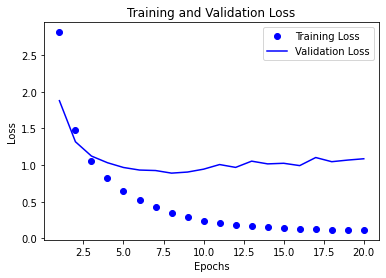

In [71]:
# 결과를 시각화 한다.

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

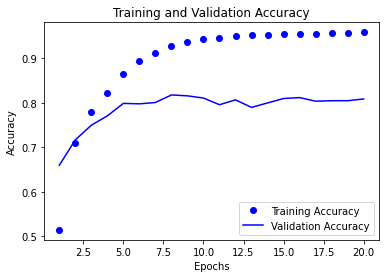

In [72]:
# 결과를 시각화 한다.

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b-', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()